In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

In [10]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

scale_factor = 1000.0
# Scale the training set's label
train_df['median_house_value'] /= scale_factor

# Scale the test set's label
test_df['median_house_value'] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

inputs = {
    'latitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='latitude'),
    'longitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='longitude')
}

# Train a model and plot the output
def create_model(my_inputs, my_outputs, my_learning_rate):
    model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

    # Construct the model to execute
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(
        learning_rate=my_learning_rate),
        loss = 'mean_squared_error',
        metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [9]:
def train_model(model, dataset, epochs, batch_size, label_name):
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the mean absolute error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse



In [5]:
def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')

    plt.plot(epochs, rmse, label='Loss')
    plt.legend()
    plt.ylim([rmse.min() * 0.94, rmse.max() * 1.05])
    plt.show()

    print("Plot was defined as well---------->")



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 13677.8594 - root_mean_squared_error: 116.9524
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 13545.9775 - root_mean_squared_error: 116.3872
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 13476.6191 - root_mean_squared_error: 116.0888
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 13385.8164 - root_mean_squared_error: 115.6971
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 13310.9443 - root_mean_squared_error: 115.3731
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 13280.1973 - root_mean_squared_error: 115.2397
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 13204.7686 - root_mean_squared_error: 114.9120
Epoch 8/30
170/170 [==============================] - 0s 2ms/step - loss: 13177.9775 - root_mean_squared_error: 114.7954
Epoch 9/30
170/170 [=======================

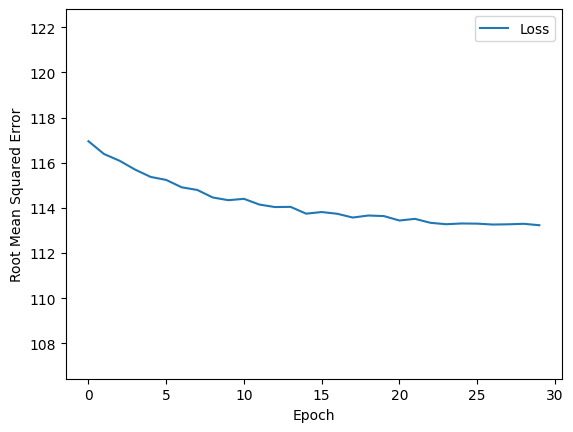

Plot was defined as well---------->
30/30 [==============================] - 0s 2ms/step - loss: 12195.9531 - root_mean_squared_error: 110.4353


[12195.953125, 110.43528747558594]

In [11]:
# The following variables are the hyperparameters.
learning_rate = 0.1
epochs = 30
batch_size = 100
label_name = 'median_house_value'

preprocessing_layer = tf.keras.layers.Concatenate()(inputs.values())

dense_output = layers.Dense(units=1, name='dense_layer')(preprocessing_layer)

outputs = {
  'dense_output': dense_output
}

# Create and compile
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)